<a href="https://colab.research.google.com/github/Preet-Kanwal-Singh/Machine-Learning-Projects/blob/main/wine%20quality%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


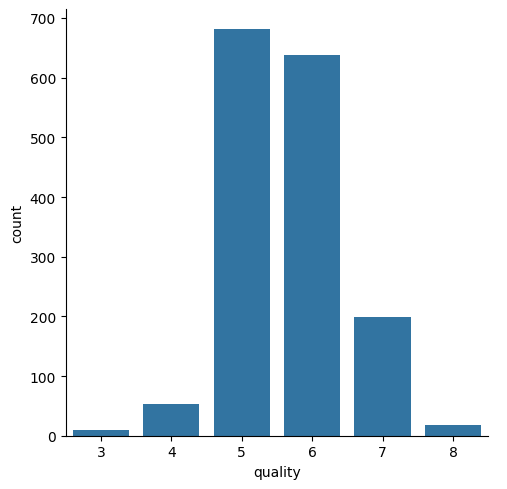

In [8]:
sns.catplot(x = "quality", data = df, kind = "count")
plt.show()

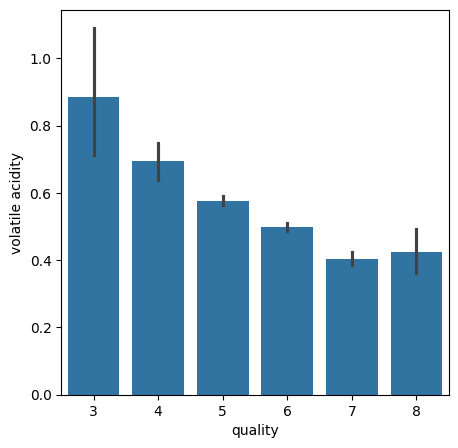

In [9]:
plt.figure(figsize=(5,5))
sns.barplot(x="quality", y = "volatile acidity", data = df)
plt.show()

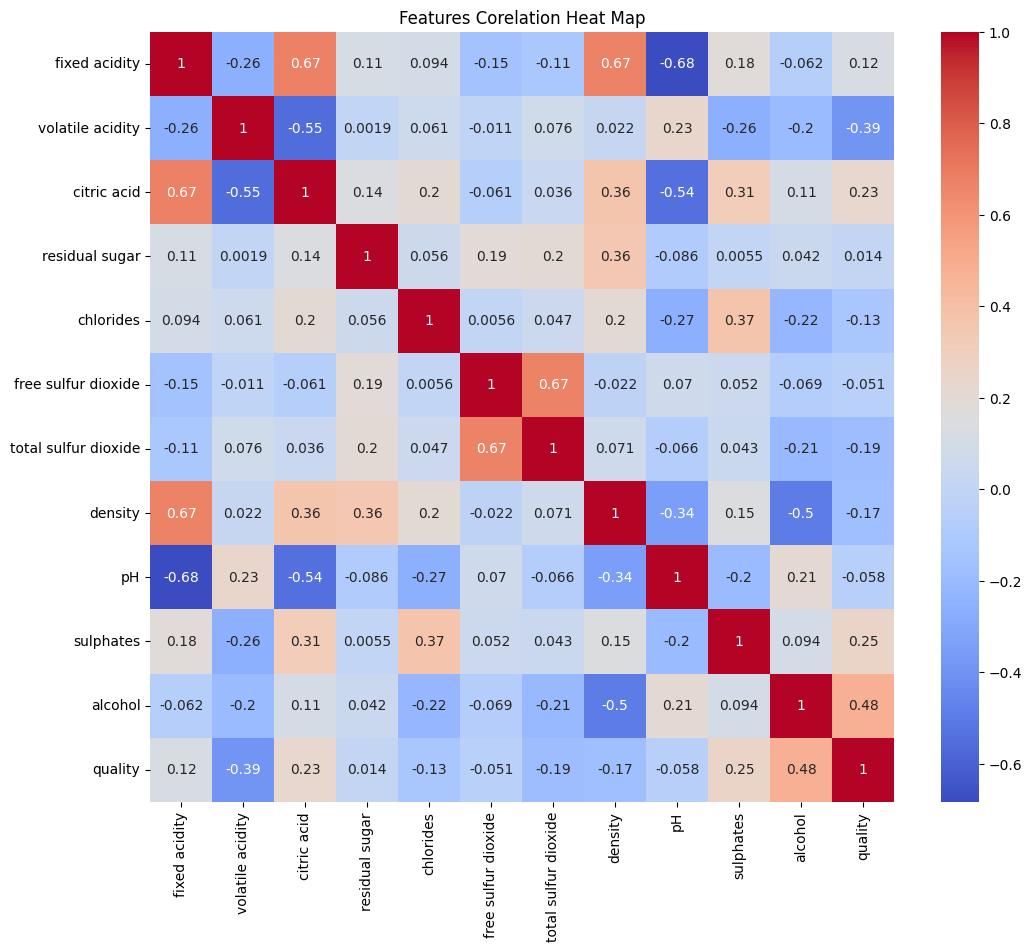

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Features Corelation Heat Map")
plt.show()

In [12]:
selected_cols = ['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'quality']
new_df = df[selected_cols]
new_df.head()

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,5
1,0.88,0.00,0.68,9.8,5
2,0.76,0.04,0.65,9.8,5
3,0.28,0.56,0.58,9.8,6
4,0.70,0.00,0.56,9.4,5


In [14]:
new_df.shape

(1599, 5)

In [15]:
x = new_df.drop(columns = 'quality', axis = 1)
y = new_df['quality']
y = y.apply(lambda y_value: 1 if y_value >= 7 else 0)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[260  13]
 [ 21  26]]


In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.89375


In [22]:
input_data = pd.DataFrame([[0.70, 0.00, 0.56, 9.4]], columns=x_train.columns)
result = model.predict(input_data)
if result == 0:
  print("Bad Quality Wine")
else:
  print("Good Quality Wine")

Bad Quality Wine
